# Clustering of Facial Embedding Vector
- Embedding vector of face with 128 elements
- AD vs Chega debate

In [2]:
# Importing the libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mtick
from PIL import Image
from collections import Counter


# Importing the data about a specific video in the folder "pkl_files"
data = pd.read_pickle("pkl_files/ad-chega.pkl")

# Order the frames by name
data = data.sort_values(by='filename')


# Question: How many distinct faces do we identify throughout the debate?
- Clustering algorithm: Lloyd’s algorithm for k-means
- Let's try to execute this for different number of clusters

In [32]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Initialize an empty list to store all embedding vectors
embedding_list = []

# Collect all facial embedding vectors from the 'fer' column of each frame
for i in range(data.shape[0]):
    for fer in data.iloc[i]['fer']:
        embedding_list.append(fer['embedding'])

# Convert the list of embeddings into a NumPy array
embedding_array = np.array(embedding_list)

for i in range(1, 11):
    # Define the number of clusters (Ventura, Montenegro, TV Host, Sign Language Interpreter)
    num_clusters = i

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=num_clusters)
    cluster_labels = kmeans.fit_predict(embedding_array)

    # Count the number of faces in each cluster and print in order of cluster number
    cluster_counts = Counter(cluster_labels)
    for cluster in range(num_clusters):
        print(f"{cluster}: {cluster_counts[cluster]}   ", end="")
    print("")
    


        

0: 6187   
0: 3855   1: 2332   
0: 2315   1: 1962   2: 1910   
0: 1858   1: 707   2: 1314   3: 2308   
0: 2308   1: 737   2: 1198   3: 1234   4: 710   
0: 709   1: 776   2: 740   3: 2308   4: 787   5: 867   
0: 606   1: 2308   2: 736   3: 606   4: 710   5: 705   6: 516   
0: 527   1: 2290   2: 615   3: 411   4: 600   5: 737   6: 315   7: 692   
0: 382   1: 2308   2: 501   3: 356   4: 531   5: 710   6: 367   7: 566   8: 466   
0: 1004   1: 467   2: 577   3: 503   4: 385   5: 323   6: 693   7: 1286   8: 404   9: 545   


# Hyphotesis formulation

1. 
- We expect optimal results for 4 clusters, since we have Ventura, Montenegro, TV host and sign language interpreter as main protagonists.
- From prior knowledge and previous tests, we know that Ventura and Montenegro have a similar speaking time, and they appear on screen a similar amount of time.
- The person who appears the most is the sign language interpreter: almost entirely throughout the whole debate.
- The person who appears less times is the TV host

2. Considering this previous notes, the results for 4 clusters seem to make sense:
 - 0: 1858 and 2: 1314 --> Ventura and Montenegro
 - 3: 2308 --> Sign interpreter
 - 1: 707 --> TV host

3. Let's compute a dimensionality reduction (using PCA) for 2D and plot data points with cluster color to check the results.

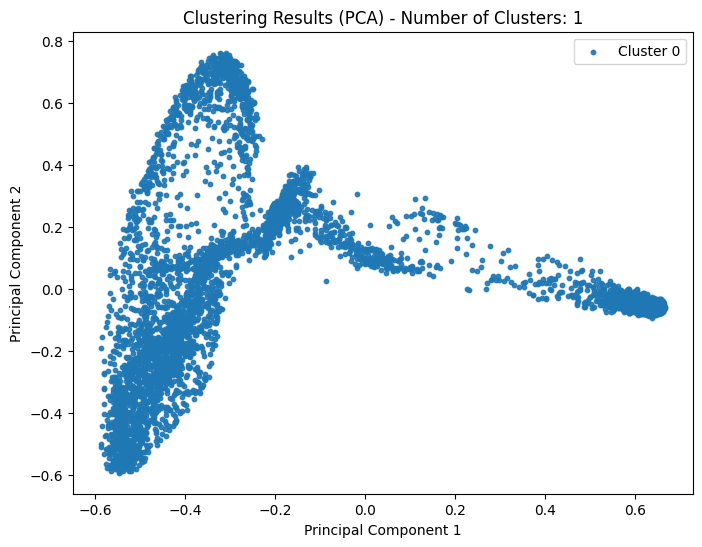

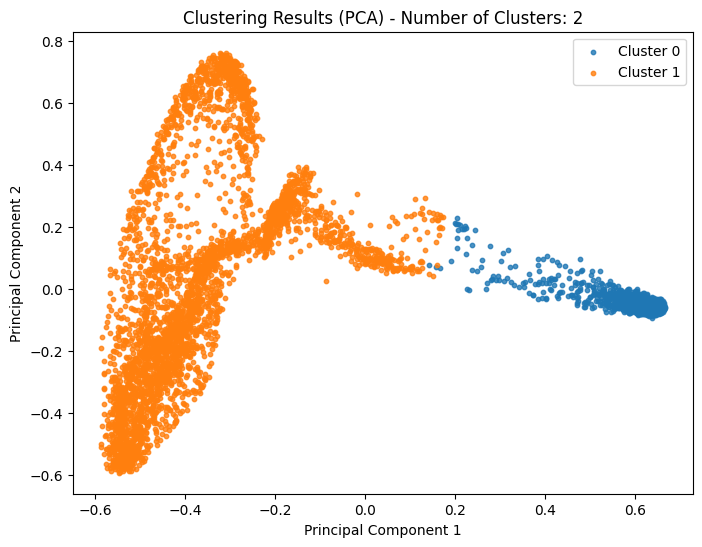

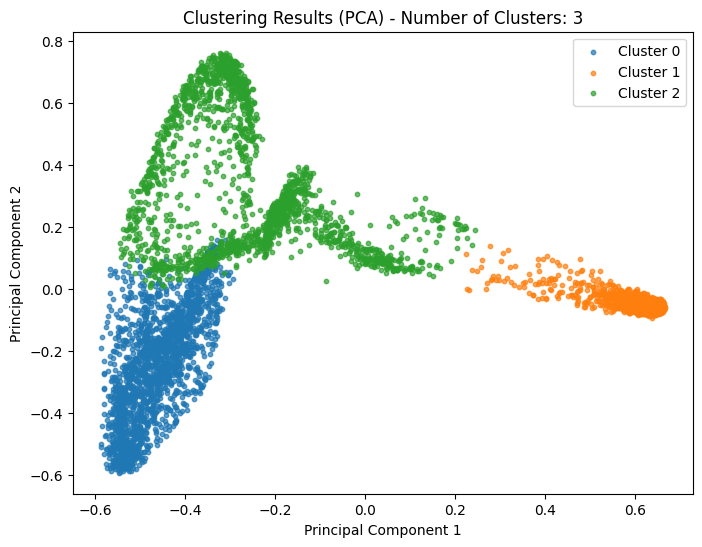

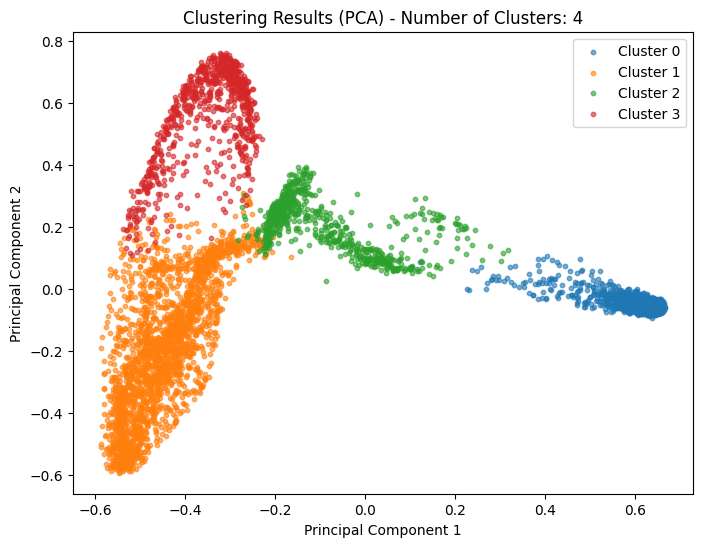

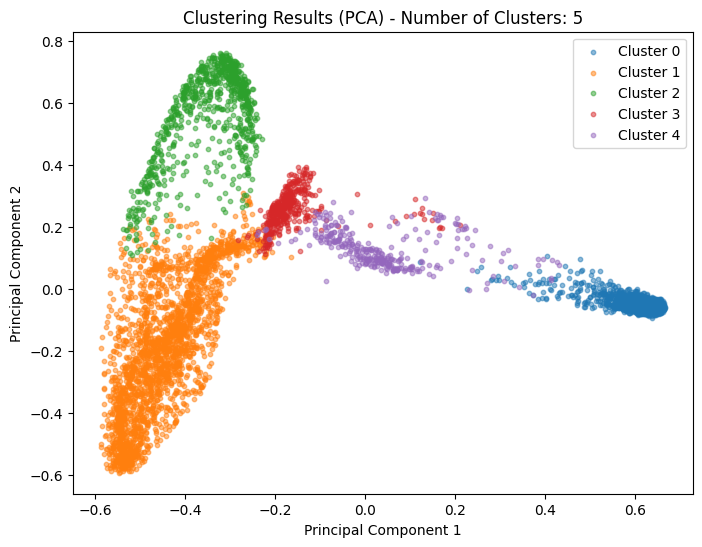

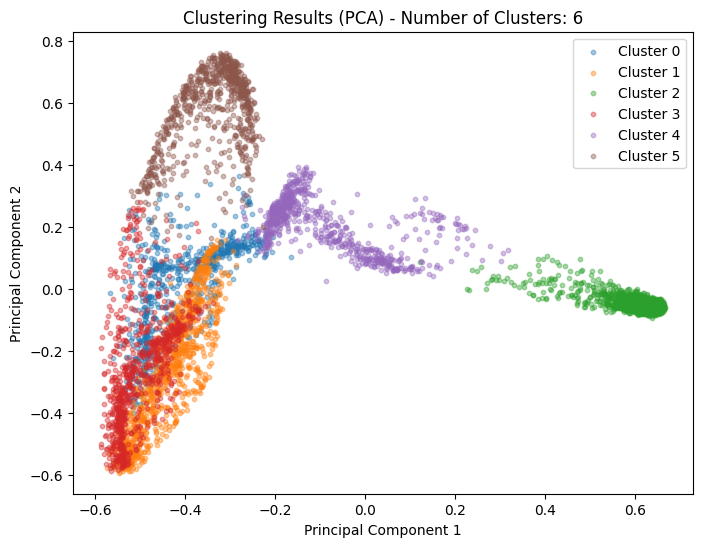

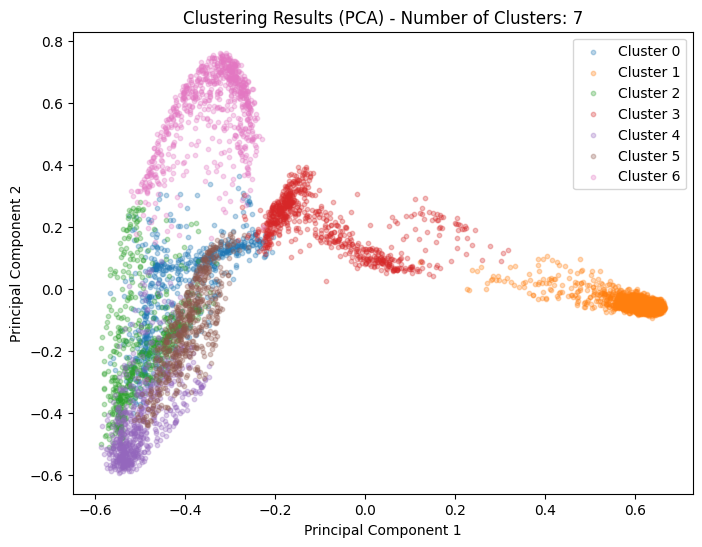

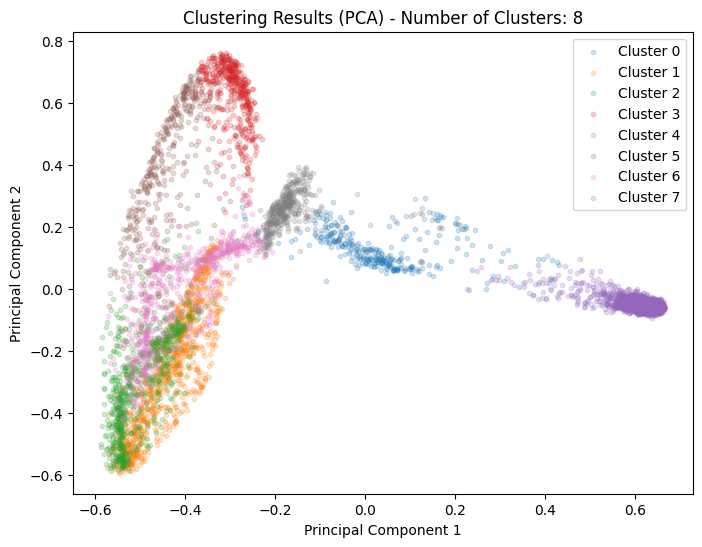

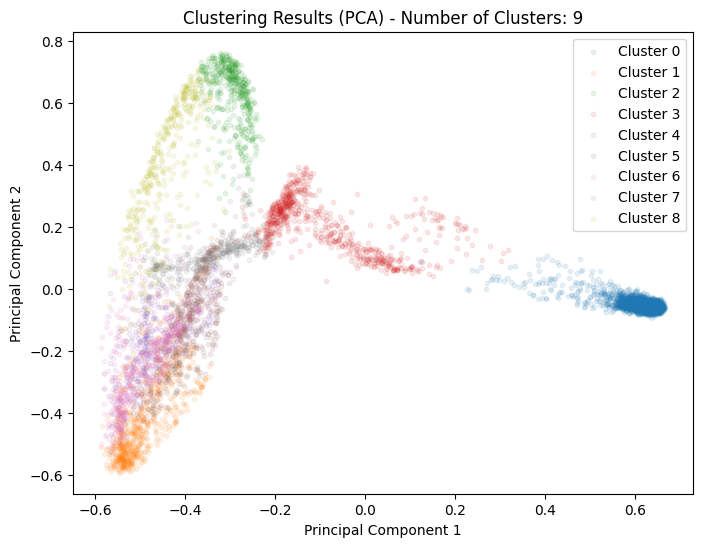

In [54]:
# Define the number of clusters
for i in range(1, 10):
    # Define the number of clusters 
    num_clusters = i

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=num_clusters)
    cluster_labels = kmeans.fit_predict(embedding_array)

    # Reduce the dimensionality of the embedding vectors using PCA
    pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
    embedding_pca = pca.fit_transform(embedding_array)

    # Plot clusters in 2D space after PCA
    plt.figure(figsize=(8, 6))
    for i in range(num_clusters):
        plt.scatter(embedding_pca[cluster_labels == i, 0], embedding_pca[cluster_labels == i, 1], label=f'Cluster {i}', alpha=1-num_clusters*0.1, s=10)
    plt.title('Clustering Results (PCA) - Number of Clusters: ' + str(num_clusters))
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show() 

# Hyphotesis formulation

1. By looking at the plots we can immediately exclude scenarios of 6+ faces due to point overlapping. Naturally, 1 or 2 cluster scenario do not make sense considering prior knowledge of the debate nature.

2. For 3, 4, and 5 clusters the results are considerably better, although there is some overlapping in the latter 2. We also must remember that this plots vary from run to run, since the first centroid initialization in Lloyid K-means algorithm is random (within the dataset)

3. Let's try to check the actual faces identified in the 

In [ ]:
# Check labeled clusters

# Iterate through each frame in the dataset
# Collect all facial embedding vectors from the 'fer' column of each frame
for i in range(data.shape[0]):
    for fer in data.iloc[i]['fer']:

## POR ACABAR
